In [38]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# Radioactive Decay 

Nuclear decay is the phenomenon where an unstable atom loses energy by emitting a particle, often a photon, neutron, electron or alpha particle. 

Atoms described with $A = Z, N$

Touch on random

Touch on statistical

NOTE: This description is a work in progress, I'll be updating this frequently for clarity


## Half Life and Radioactive Decay
NOTE: For high school students you'll have to change $e$ to 2.whatever and $\ln(2)$ to 0.6something. Clearly I've forgotten about decimals. (Although Letters >> Decimals)

The half-life of an unstable atom is the amount of time required on average for half of a population of that atom to remain. For example, if an atom has a half-life of twenty minutes, and you had 1000 atoms originally, after twenty minutes you would expect to have 500 atoms remaining on average. However that doesn't mean that your atoms have disappeared! Those unstable atoms have **decayed**. Most commonly an atom decays by emitting radiation either by emitting a electron, neutron, positron, or alpha particle (helium with no electrons (He$^{2+}$)). In the process of emitting these particles, an element can either become a different **isotope**, where it has the same number of protons, but a different number of neutrons, or become a different element all together either by losing/gaining protons through decay processes.  

### Modes of decay

#### Alpha ($\alpha$) Decay

Alpha decay is the mode of decay wherein an atom emits an $\alpha$ particle thereby reducing the number of neutrons $N$ and the number of protons $Z$. In general, for an atom X with atomic number $A$, the sum of neutrons and protons, decaying into an atom $Y$ via $\alpha$ decay has the following form:


\begin{equation}
^A_ZX^N \rightarrow ^{A-4}_{Z-2}Y^{N-2} + ^4_2\alpha^2 
\end{equation}

Or, written in terms of a concrete example, the $\alpha$ decay of Uranium-235
\begin{equation}
_{92} ^{235} \text{U} \rightarrow _{90} ^{231}\text{Th} + _2 ^4\alpha
\end{equation}

Where we see that uranium-235 decays to Thorium-231 by emitting an $\alpha$ particle. Notice however, that the total number of neutrons and protons are equal on both the right hand side and the left hand side of the reaction.

#### Beta $\beta$ Decay

$\beta$ decay comes in two favors: beta positive ($\beta^+$) decay and beta minus ($\beta^-$) decay. $\beta^-$ decay emits an electron, and $\beta^+$ decay emits the anti-particle of the electron: the positron (a particle with the same mass, but opposite charge of an electron). In the case of $\beta^+$ decay, the element emits a positron from a proton, thereby loosing a proton and gaining an electron.  In the case of $\beta^-$ decay, a neutron emits an electron thereby losing a neutron and gaining a proton. They also emit another particle known as a neutrino FIGURE OUT HOW TO EXPLAIN THE NEUTRINO

#### $\beta^-$

Generally speaking $\beta^-$ decay has the following form

\begin{equation}
^A _Z\text{X}^N \rightarrow _{Z+1}^A\text{Y}^{N-1} + e^- + \bar{\nu}
\end{equation}

where $\bar{\nu}$ is an anti-neutrino. Notice that charge and mass is conserved. From the above formula, we see that a neutron is emitting an electron and anti-neutrino and then becomes a proton. 

#### $\beta^+$

\begin{equation}
^A _Z\text{X}^{N} \rightarrow _{Z-1}^A\text{Y}^{N+1} + e^+ + \nu
\end{equation}

where $\nu$ is a neutrino. Notice that charge and mass is again conserved. From the above formula, we see that a proton is emitting a positron and neutrino, and the becomes a neutron

#### Electron Capture
This wasn't in the Alberta curriculum thing but would it important? There's also a whole bunch of others that we could toss in here that could be considered optional. I kind of want to put it in because then the neutron capture stuff will make more sense. Not that that's required either, but it would make for a cool animation.


### Some Mathematical Background

The half-life of an atom is often denoted as $\tau_{1/2}$, measured in seconds,  where $\tau$ is the Greek letter tau.

PUT A NICE SEGUE HERE SO THE FLOW WORKS

To calculate the amount of an atom left over some time $t$ we use the following equation

\begin{equation}
N(t) = N_0 e^{-\lambda t}
\end{equation}

Where $N(t)$ is the _number_ of atoms you have at time $t$, $N_0$ is the original number of atoms at $t=0$ and $\lambda$ is known as the "half life constant" and has units of inverse seconds. $\lambda$ is related to the half life by the following relationship

\begin{equation}
\lambda = \frac{\ln(2)}{\tau_{1/2}}
\end{equation}
The above relationships represent a measure of the number of atoms you have at any given time $t$, however, what if you wanted to know the _probability_ that an atom will have decayed at some time $t$? Well the probability that an atom has _not_ decayed at some time $t$ is given by

\begin{equation}
p_{exist} = e^{-\lambda t}
\end{equation}

Meaning that the probability that an atom will decay at time $t$ is simply one minus the probability that it hasn't, or

\begin{equation}
p_{decay} = 1 - p = 1 - e^{-\lambda t}
\end{equation}


With these relationships it is possible to calculate the relative probability of if an atom has decayed or not. However, it also gives us an opportunity to use python to simulate what we might measure if we were to observe an atom decaying over time. Essentially for a range in time, we can calculate the probability that an atom has decayed at each instance in time, and use a random number generator to decide if the atom has decayed or not (EXPLAIN WHY IN SIMPLE TERMS). 

In pseudo code:

```python

for instances in time:
    prob_decay = 1 - exp(-lambda * instance_in_time)
    for atom in atoms:
        r = random_number()
        if prob_decay > random_number:
            atom.decays()
```
    
Where you'll notice that we calculate the probability of decay **before** we enter the loop where we see if an atom decays or not. This is because at a single instant of time, the probability of decay for each atom is **independent**: if one atom decays, this does not affect if any of the others also decay.

Touch on:

Each atom has different halflife

Random

Gather half-life constants of all atoms and put the plot on a slider so they can look at hella atoms

Here we see an example of this behavior for carbon-15, which has a half life of 2.249 seconds.

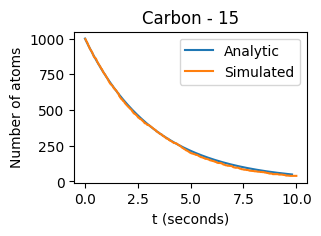

In [1]:
%matplotlib inline
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt 
import random

def HalfLifeEquation(N_0, lamb,t):
    return N_0 * 2.71828 ** (-lamb * t)

# Halflife of carbon-15 is 2.249 seconds

t = np.linspace(0,4*2.449,500)
plt.figure(figsize=(3, 2), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(t, HalfLifeEquation(1000, np.log(2)/2.249, t), label="Analytic")
plt.ylabel("Number of atoms")
plt.xlabel("t (seconds)")
plt.title("Carbon - 15")


def Decay(N_0, lamb,max_time, steps=100):
    time_atom_pairs = []
    N = N_0
    time_step = max_time/steps
    t = 0

    for i in range(steps):
        
        # For each step in time, we need to check if each atom 
        # decays or not note we only calculate our probability
        # once because at a single instant in time, the probability
        # of decay is the same for each -- they are independent 
        # events. 
        
        # this is the equation we saw eariler 
        # TODO: GIVE THIS EQUATION EARLIER. 
        p = 1 - HalfLifeEquation(N, lamb, time_step)/N
        # Maybe explain the _ part? 
        for _ in range(N):
            
            # This is a 'random' number between 0 and 1
            # that we will use to compare to our decay probability
            r = random.uniform(0,1)
           
            # if our decay probability for the atom is greater, that 
            # atom decays. 
            if r < p:
                N = N -1
           
            # if we run out of atoms we should stop
            if N == 0:
                break
        
        # We have now moved forward in time once again!
        t = t + time_step
        # Store how many atoms at a given time t we have in 
        # an array. 
        time_atom_pairs.append([N, t])
        
    return time_atom_pairs

decays = Decay(1000, np.log(2)/2.249, 10, steps=500)



y,x = np.array(decays).T
#print(x)
#print(decays)
plt.plot(x,y, label = "Simulated")
plt.legend()
plt.show()
            
        
            
    
   


# Simulations 

Below you have a widget where you can compare how quickly different atoms decay and view a simulation of how that process would look if you were to observe these counts yourself. The data is pulled automatically from the National Institutes of Standards [here](https://www.nist.gov/pml/radionuclide-half-life-measurements-data). You can choose which isotopes to watch their decay with the element drop-down menus, and you can run for more or less time with the `Scale_Time` slider. To watch an animation of their decay, simply click the box by `AnimateDecay`. Certain half lives are so different that the animations aren't that exciting.

**Things you should try**
1. Animate the decay of the same element twice. Do the traces look the same? If so why? If not, why not?
2. Compare two isotopes with wildly different half lives.

NOTE: Currently you have to wait for the animiation to finish before doing something else, I'm looking into how to interrupt and move on. I also note that you should un-click `AnimateDecay` before switching elements so it doesn't automatically run.

TODO: Switch this to plotly?

In [2]:
import pandas as pd
from ipywidgets import interactive
import time
from IPython import display
# Note you need lxml, and beautiful soup for the load html to work


# Steal some data from the National Institute of Standards
df = pd.read_html('https://www.nist.gov/pml/radionuclide-half-life-measurements-data')


def DecayRace(Element1, Element2, Scale_Time=1, AnimateDecay = False):
    
    N_0 = 1000
    
    index1 = np.where(df["Radionuclide"] == Element1)[0][0]
    HalfLife1 = df["HalfLife"].iloc[index1]
    index2 = index2 = np.where(df["Radionuclide"] == Element2)[0][0]
    HalfLife2 = df["HalfLife"].iloc[index2]
    
    multiplies = {'s':1., "min":60., "h":3600., "d":3600.*24.}
    
    half_life1, pm1, delta_time1, unit1 = HalfLife1.split()
    half_life2, pm2, delta_time2, unit2 = HalfLife2.split()
    
    multiplyer1 = multiplies[unit1]
    multiplyer2 = multiplies[unit2]
    
    multiplyer = max(multiplyer1, multiplyer2)
    time_length = max(half_life1, half_life2)
   
    my_title = "".join(["Half life of ",
                       Element1, 
                       ": ",
                       half_life1, 
                       " ",
                       unit1, 
                       "\n", 
                       "Half life of ", 
                       Element2, 
                       ": " , 
                       half_life2,
                       " ",
                       unit2])
    
    t = np.linspace(0, Scale_Time * float(time_length) * multiplyer, 5000)
    plt.style.use("dark_background")
    plt.plot(t, 
             HalfLifeEquation(N_0, 
                              np.log(2)/(float(half_life1) * multiplyer),
                              t), 
             label=Element1)
    
    plt.plot(t, 
             HalfLifeEquation(N_0,
                              np.log(2)/(float(half_life2) * multiplyer), 
                              t), 
             label=Element2)
    
    plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,2))
    
    plt.xlabel("Time in seconds")
    plt.ylabel("Number of Atoms")
    plt.title(my_title)
    plt.legend()
    plt.show()
    display.clear_output(wait=True)
    
    if AnimateDecay == True:
        
        # plt.close()
        
        Points1 = Decay(N_0, np.log(2)/(float(half_life1) * multiplyer), 
                  max_time= Scale_Time * float(time_length) * multiplyer, 
                  steps=50)
      
        Points2 = Decay(N_0, np.log(2)/(float(half_life2) * multiplyer), 
                  max_time= Scale_Time * float(time_length) * multiplyer, 
                  steps=50)
        
        y1,x1 = np.array(Points1).T
        y2,x2 = np.array(Points2).T
        
        label1 = " ".join(["Simulated decay:", Element1])
        label2 = " ".join(["Simulated decay:", Element2])
        
        for i in range(1, len(x1)):
            plt.plot(t,
                     HalfLifeEquation(N_0, 
                                      np.log(2)/(float(half_life1) * multiplyer),
                                      t), 
                     label= Element1)
          
            plt.plot(t,
                     HalfLifeEquation(N_0, 
                                      np.log(2)/(float(half_life2) * multiplyer), 
                                      t), 
                     label= Element2) 
            
            plt.plot(x1[0:i], y1[0:i], label=label1)
            plt.plot(x2[0:i], y2[0:i], label=label2)
            plt.xlabel("Time in seconds")
            plt.ylabel("Number of Atoms")
            plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
            plt.title(my_title)
            plt.legend()
            plt.show()
            # display.display(plt.gcf())
            display.clear_output(wait=True)
            # print(i)
            if i == len(x1):
                break
       
        plt.plot(t, 
                 HalfLifeEquation(N_0,
                                  np.log(2)/(float(half_life1) * multiplyer), 
                                  t),
                 label=Element1)
       
        plt.plot(t, 
                 HalfLifeEquation(N_0, np.log(2)/(float(half_life2) * multiplyer), 
                                  t), 
                 label=Element2)
        
        plt.plot(x1, y1, label=label1)
        plt.plot(x2, y2, label=label2)
        plt.xlabel("Time in seconds")
        plt.ylabel("Number of Atoms")
        plt.ticklabel_format(style='sci', axis='x', scilimits=(1,4))
        plt.title(my_title)
        plt.legend()
        plt.show()
 
        
    
df = df[0]   
# Rename our columns to something more managable
df.columns = ["Radionuclide", 
              "NumberOfSources", 
              "HalfLifes_Followed", 
              "HalfLife", 
              "StandardUncertainty", 
              "OtherUncertainty", 
              "ref"]

interactive_plot = interactive(DecayRace, Element1=df["Radionuclide"], Element2 = df["Radionuclide"],continuous_update=False)
interactive_plot


interactive(children=(Dropdown(description='Element1', options=('3H', '18F', '22Na', '24Na', '32P', '44Ti', '46Sc', '51Cr', '54Mn', '57Co', '58Co', '59Fe', '60Co', '62Cu', '65Zn', '67Ga', '75Se', '85Kr', '85Sr', '88Y', '99Mo', '99mTc', '99mTc', '103Ru', '109Cd', '110mAg', '111In', '113Sn', '117mSn', '123I', '125I', '125Sb', '127Xe', '131I', '131mXe', '133Ba', '133Xe', '134Cs', '137Cs', '139Ce', '140Ba', '140La', '141Ce', '144Ce', '152Eu', '153Gd', '153Sm', '154Eu', '155Eu', '166Ho', '169Yb', '177Lu', '181W', '186Re', '188Re', '188W', '192Ir', '195Au', '198Au', '201Tl', '202Tl', '203Hg', '203Pb', '207Bi', '228Th'), value='3H'), Dropdown(description='Element2', options=('3H', '18F', '22Na', '24Na', '32P', '44Ti', '46Sc', '51Cr', '54Mn', '57Co', '58Co', '59Fe', '60Co', '62Cu', '65Zn', '67Ga', '75Se', '85Kr', '85Sr', '88Y', '99Mo', '99mTc', '99mTc', '103Ru', '109Cd', '110mAg', '111In', '113Sn', '117mSn', '123I', '125I', '125Sb', '127Xe', '131I', '131mXe', '133Ba', '133Xe', '134Cs', '137Cs', '139Ce', '140Ba', '140La', '141Ce', '144Ce', '152Eu', '153Gd', '153Sm', '154Eu', '155Eu', '166Ho', '169Yb', '177Lu', '181W', '186Re', '188Re', '188W', '192Ir', '195Au', '198Au', '201Tl', '202Tl', '203Hg', '203Pb', '207Bi', '228Th'), value='3H'), IntSlider(value=1, description='Scale_Time', max=3, min=-1), Checkbox(value=False, description='AnimateDecay'), Output()), _dom_classes=('widget-interact',))

MC Simulation of radioactive decay for fun

Fusion/fission simplified example?